In [58]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [59]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [60]:
train["relaciones"]=train["relaciones"]+train["antonimos"]

<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

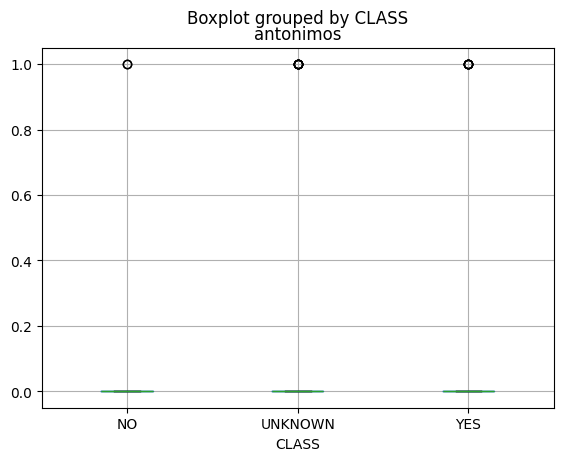

In [61]:
train.boxplot(by="CLASS",column=["antonimos"])

In [62]:
train=train.drop(["suma","distancias","entropias","antonimos"],axis=1)
train

,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,0.000000e+00,0.000000,0.000000,0,1.000000,YES
1,1.426637e-12,5.346563,0.000000,5,0.000000,NO
2,1.893862e+00,2.843741,0.555501,1,0.462982,UNKNOWN
3,0.000000e+00,0.000000,0.000000,0,1.000000,YES
4,1.965056e+00,0.978448,0.231184,0,0.037146,YES
...,...,...,...,...,...,...
95,1.853584e+00,0.616965,0.424818,0,0.258356,UNKNOWN
96,0.000000e+00,0.000000,0.000000,0,1.000000,YES
97,0.000000e+00,0.000000,0.000000,0,1.000000,UNKNOWN
98,0.000000e+00,0.000000,0.000000,0,1.000000,NO


In [63]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [64]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [65]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

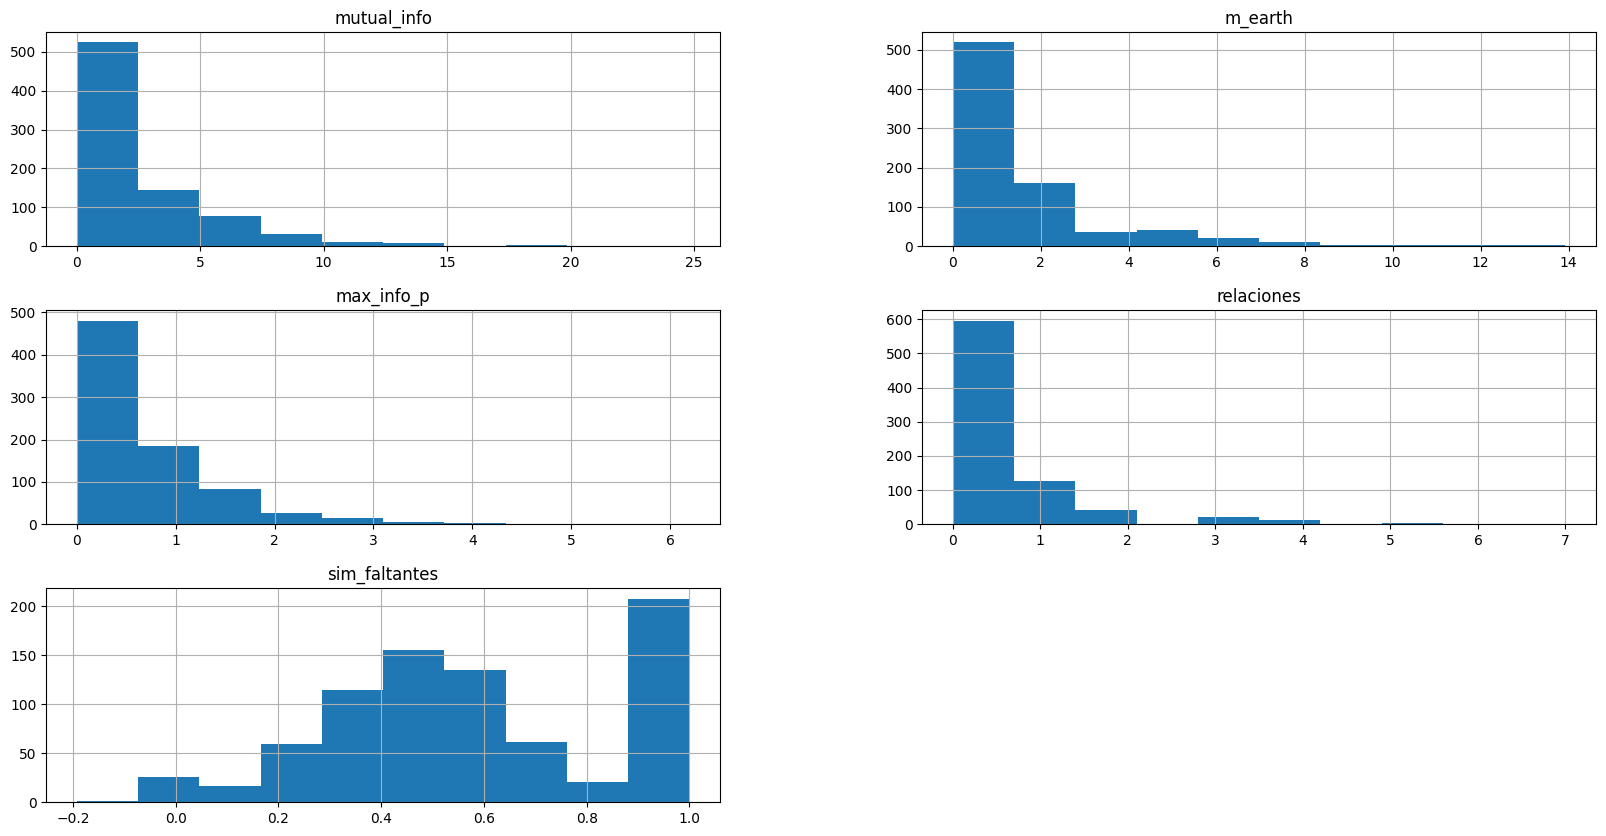

In [66]:
train.hist(figsize=(20,10))
plt.show()

In [67]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [68]:
test["relaciones"]=test["relaciones"]+test["antonimos"]

In [69]:
test=test.drop(["suma","distancias","entropias","antonimos"],axis=1)
test

,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,3.738683e+00,7.061271,0.919573,0,0.457370,YES
1,1.926521e+00,0.701502,0.393066,0,0.338005,YES
2,2.273737e-13,4.289287,0.000000,0,0.000000,YES
3,0.000000e+00,0.000000,0.000000,0,1.000000,YES
4,1.812693e+00,0.973838,0.412710,0,0.413161,NO
...,...,...,...,...,...,...
95,0.000000e+00,0.000000,0.000000,1,1.000000,YES
96,0.000000e+00,0.000000,0.000000,0,1.000000,NO
97,1.867865e+00,0.589826,0.467463,0,0.485553,UNKNOWN
98,1.811190e+00,1.010164,0.353093,0,0.234342,UNKNOWN


In [70]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [71]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [72]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [73]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [74]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [75]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [76]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [77]:
model.decision_function(X)

array([ 9.64671972e-01, -8.29886819e-01,  1.38241708e-01,  9.64671972e-01,
       -1.17087140e-01,  5.19090644e-01,  9.64671972e-01,  9.64671972e-01,
       -1.70650307e-01, -9.08542602e-01,  3.83745004e-02,  9.64671972e-01,
        1.79610762e-01,  3.81406341e-01,  1.04035572e+00,  9.64671972e-01,
       -4.77690242e-01,  3.67367034e-01,  4.18045990e-01,  1.71614231e-01,
        3.19396822e-01,  1.72801822e-01,  4.83877886e-01,  3.83314306e-01,
       -1.52136124e-02,  6.01164865e-01,  6.01164865e-01,  1.83947300e-01,
        2.55922850e-01,  4.31209297e-01,  3.49179637e-01,  1.86886691e-01,
        3.18552660e-01,  2.82516595e-01,  2.51070571e-01,  6.01164865e-01,
        1.95763539e-01,  4.81853430e-01,  3.08451669e-01,  9.64671972e-01,
        3.21930577e-01,  2.88664416e-01, -5.93776057e-01,  3.51918464e-01,
        1.62904222e-01,  2.37657758e-01,  2.89619935e-01,  6.01164865e-01,
        2.39910270e-01,  6.01164865e-01, -2.53760263e-01,  5.00995619e-01,
       -7.44239711e-01,  

In [78]:
labels=train.columns[:-1]
labels

Index(['mutual_info', 'm_earth', 'max_info_p', 'relaciones', 'sim_faltantes'], dtype='object')

In [79]:
model.classes_

array([0, 1])

In [80]:
model.coef_[0]

array([-1.26325546,  0.19107957,  0.46031735, -0.32390783,  0.1431284 ])

In [81]:
coeficientes=model.coef_[0]

In [82]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  2 max_info_p 0 mutual_info


In [83]:
n_columns=train.shape[1]-1

In [84]:
n_columns

5

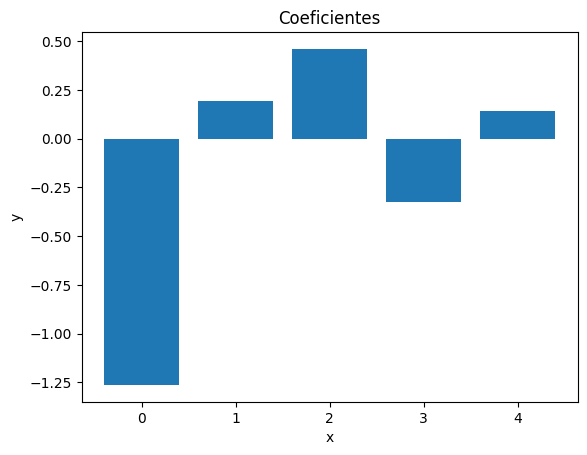

In [85]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [86]:
predictions = model.predict(X_test)

In [87]:
print(confusion_matrix(y_test, predictions))

[[198 192]
 [136 274]]


In [88]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.59
precision:  0.59
recall 0.67
f1_score:  0.63
matthews_score:  0.18


In [89]:
X_train.shape

(800, 5)

In [90]:
X_test.shape

(800, 5)

In [91]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [92]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [93]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.590000 (0.051724)


In [94]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.740000 (0.073123)


In [95]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.660000 (0.051385)


In [96]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.220000 (0.078586)


In [97]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [98]:
model = linear_model.LogisticRegression().fit(X_train,y_train)

In [99]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer.shap_values(X_test)

In [100]:
explainer.expected_value

-0.0883836670557307

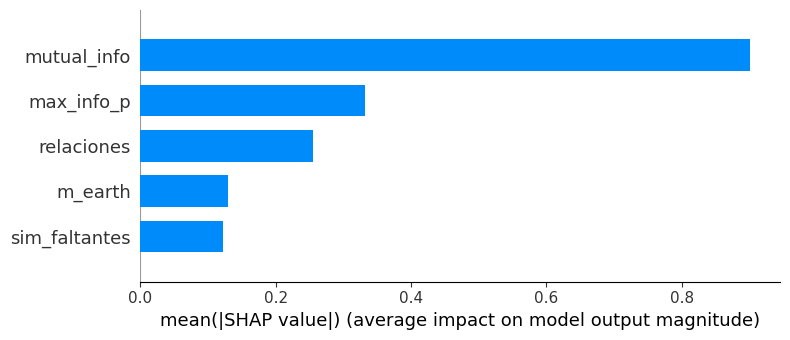

In [101]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1],plot_type="bar")